In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits 
from astropy.table import Table
import os
plt.ion()

In [6]:
a = (23, 56, 2, 4, 3)
b = np.mean(a)
print(b)

17.6


In [3]:
data = fits.open("hst_results_nd.fits")

In [53]:
os.getcwd()

'/home/todor/Faculty/Teaching/Python'

In [3]:
hdu = fits.open("hst_results_nd.fits")

In [4]:
hdu.info()

Filename: hst_results_nd.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      16   (15419,)   uint8   
  1  /Users/pyanchulova/Documents/scylla/beast_stats_files/LMC/15891_L...    1 BinTableHDU    596   3626R x 292C   [30A, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, K, D, K, 9A, D, D, E, E, E, E, E, E, E, E, E, E, I, E, E, E, E, E, E, E, E, E, E, I, E, E, E, E, E, E, E, E

In [5]:
hdr = hdu[0].header

In [6]:
data = hdu[0].data

In [7]:
print(hdr)

SIMPLE  =                    T / Standard FITS format                           BITPIX  =                    8 / Character data                                 NAXIS   =                    1 / Text string                                    NAXIS1  =                15419 / Number of characters                           VOTMETA =                    T / Table metadata in VOTable format               EXTEND  =                    T / There are standard extensions                  COMMENT                                                                         COMMENT The data in this primary HDU consists of bytes which                    COMMENT comprise a VOTABLE document.                                            COMMENT The VOTable describes the metadata of the table contained               COMMENT in the following BINTABLE extension.                                    COMMENT Such a BINTABLE extension can be used on its own as a perfectly         COMMENT good table, but the information 

In [8]:
t = Table.read("hst_results_nd.fits")
ra = t["RA"]
dec = t["DEC"]
av = t["Av_p50"]

In [17]:
# t[0].colnames  #  Print column content in table

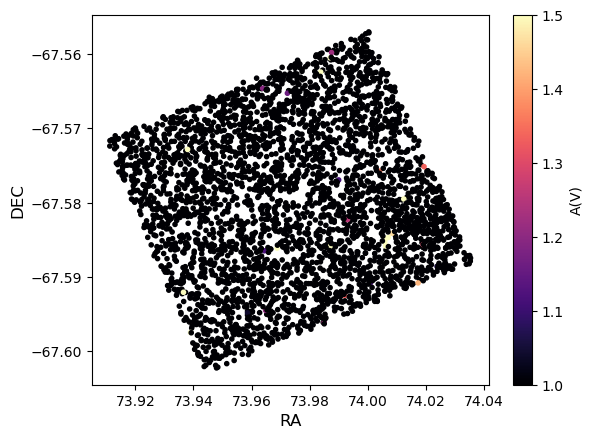

In [14]:
plt.figure()
# plt.plot(ra,dec, '.b', ls='')  # 'b' for blue color, 'r' for red
cb = plt.scatter(ra, dec, c=av, marker='.', cmap='magma', vmin=1.0, vmax=1.5) # 's' for squares, 'o' for circles, '.' for dots
plt.colorbar(cb, label='A(V)')  # plot with a colorbar
plt.xlabel("RA",fontsize=12)
plt.ylabel("DEC",fontsize=12)
plt.savefig("LMC_av_spatial.pdf")  # The extension automatically sets the file format
plt.savefig("LMC_av_spatial.png")
plt.savefig("LMC_av_spatial.eps")

In [54]:
dist = t["distance_p50"]

Text(58, 270, '50.0')

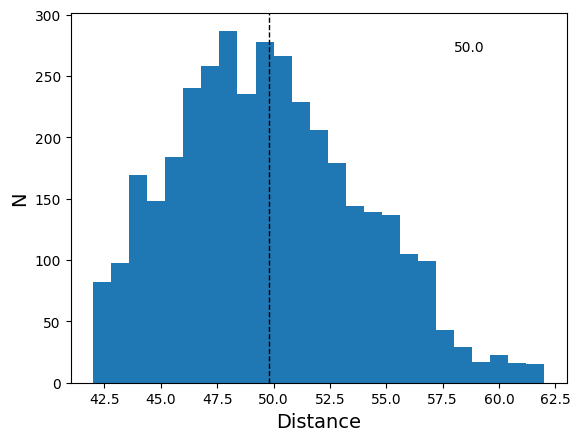

In [69]:
plt.figure()
plt.hist(dist/1000, bins=25)   # Distance in kpc
plt.xlabel("Distance", fontsize=14)
plt.ylabel("N", fontsize=14)
d_mean = np.mean(dist/1000)
plt.axvline(d_mean, c='black', ls='--', lw=1)  # Abbreviation 'k' for blacK
plt.text(58,270,'%s' % np.around(d_mean))  # Print the mean distance

In [88]:
cat = Table.read("hlsp_scylla_hst_wfc3_lmc-04_multi_v1_st.fits")
f = "hlsp_scylla_hst_wfc3_lmc-04_multi_v1_st.fits"

In [80]:
# t[0].colnames

In [79]:
f475 = cat["F475W_VEGA"]
f814 = cat["F814W_VEGA"]

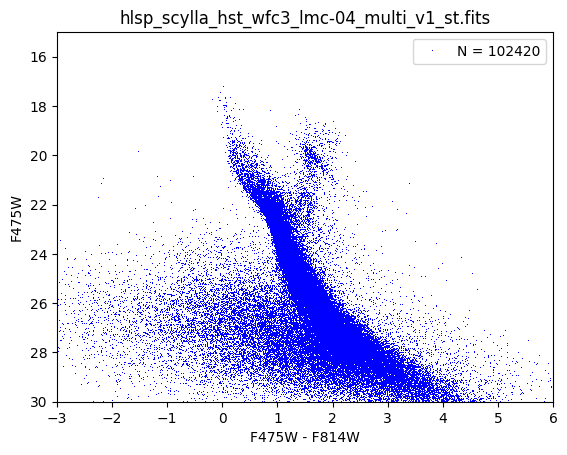

In [98]:
# Plot the CM diagram
plt.xlim(-3,6)
plt.ylim(30,15)
col = f475 - f814
mag = f475
n = len(f475)

plt.plot(col, mag, ',b', ls='', label='N = %s' %n)
plt.legend()   # Plot the legend
plt.xlabel("F475W - F814W")
plt.ylabel("F475W")
plt.title('%s' % f)
plt.savefig("CMD_LMC_4.png")